# Erster Schritt - Wie immer...

1. Library installieren
1. Key zu dem Client-Instanz weitergeben

In [1]:
!pip install -q openai

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 383.7/383.7 kB 5.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.4/76.4 kB 3.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.0/78.0 kB 3.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 325.2/325.2 kB 10.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 2.6 MB/s eta 0:00:00


In [2]:
from openai import OpenAI
from google.colab import userdata
import os

MODEL="gpt-4o-mini"
client = OpenAI(api_key=userdata.get("OPENAI_API_KEY"))

## Ganz einfaches Request mit Bild-URL


Heute verwenden wir dieses Bild:


<img src="https://upload.wikimedia.org/wikipedia/commons/6/6a/Zentralbibliothek_Z%C3%BCrich_-_Z%C3%BCrich_-_991064057999705501.jpg" width="500">


GPT-4o und GPT-4o-mini sind VLM(Vision-Language Model) - Sie können auch mit dem digitalen Bilder umgehen.
Um eine Bild-Datei einzugeben, gibt es bei OpenAI-API zwei Möglichkeiten:

1. Bild-URL verwenden
1. Bild-Datei in Base64 codieren

## Beispiele für Bild-URL



### Beipsiel mit einem normaler Bild-URL

In [ ]:
response = client.chat.completions.create(
    model=MODEL,
    messages=[
        {
            "role": "user",
            "content": [
                {"type": "text", "text": "Kannst du das Bild auf Deutsch beschreiben?"},
                {
                    "type": "image_url",
                    "image_url": {
                        "url": "https://upload.wikimedia.org/wikipedia/commons/6/6a/Zentralbibliothek_Z%C3%BCrich_-_Z%C3%BCrich_-_991064057999705501.jpg",
                    }
                },
            ],
        }
    ],
    max_completion_tokens=300,
)

print(response.choices[0].message.content)


Das Bild zeigt eine historische Ansicht von Zürich, illustriert in einer frühen Druckgrafik. Im Vordergrund sieht man den Zürichsee, auf dem einige Boote fahren. Die Stadt selbst ist in der Mitte abgebildet, mit mehreren markanten Türmen und Gebäuden, die die Skyline prägen. 

Über der Stadt ist der Titel "Zürich" zu lesen, umgeben von einer verzierten Bordüre. Unten im Bild befindet sich ein Text, der möglicherweise Informationen oder eine Beschreibung über die Stadt enthält. 

Hinter der Stadt erstrecken sich Hügel und Berge, die die Landschaft um Zürich prägen. Insgesamt vermittelt die Grafik einen Eindruck von der historischen Architektur und der natürlichen Umgebung dieser Stadt.


### Beispiel mit IIIF-Image-API

Das funktioniert auch mit IIIF-Image-API...
Also ein Bsp...

<img src="https://iiif.bodleian.ox.ac.uk/iiif/image/790f4240-9750-4818-8a62-4a88e83e7ab2/full/full/0/default.jpg" width="500">



Dies kommt durch IIIF-Image-API (v2). URL sieht so aus:
```
https://iiif.bodleian.ox.ac.uk/iiif/image/790f4240-9750-4818-8a62-4a88e83e7ab2/full/full/0/default.jpg
```

Dieses Bild gehört zu dem IIIF-Manifest (© Bodleian Libraries, University of Oxford):
```
https://iiif.bodleian.ox.ac.uk/iiif/manifest/60834383-7146-41ab-bfe1-48ee97bc04be.json
```



In [ ]:
response = client.chat.completions.create(
    model=MODEL,
    messages=[
        {
            "role": "user",
            "content": [
                {"type": "text", "text": "Kannst du das Bild auf Deutsch beschreiben?"},
                {
                    "type": "image_url",
                    "image_url": {
                        "url": "https://iiif.bodleian.ox.ac.uk/iiif/image/790f4240-9750-4818-8a62-4a88e83e7ab2/full/full/0/default.jpg",
                    }
                },
            ],
        }
    ],
    max_completion_tokens=300,
)

print(response.choices[0].message.content)

Das Bild ist eine mittelalterliche Illumination, die in vier Abschnitte unterteilt ist. Im oberen Teil sind mehrere Szenen dargestellt: links sieht man eine Frau im Bett, umringt von anderen Frauen, und auf der rechten Seite gibt es eine Szene mit einem König, der mit einer Gruppe von Menschen spricht. 

Im unteren Abschnitt ist eine andere Szene mit einer Frau, die im Bett liegt, während andere Personen anwesend sind. Auch hier sind wieder königliche Figuren und eine Szene, die möglicherweise einen Gefängnisaufenthalt darstellt, zu sehen. Die gesamte Komposition ist reich verziert mit floralen Ornamenten und detaillierten Hintergrundmustern, was auf den kunstvollen Stil der Zeit hinweist.


## Beispiel für Base64-Kodierung


Es gibt Situation wo wir die Bild-Dateien nicht im Internet publizieren können und deshalb keinen URL liefern können.
In diesem Fall müssen wir das Bild-Datei zuerst in Base64 kodieren. Danach soll man Base64-String als URL weitergeben.

Bei diesem Prozess braucht man ein Schritt mehr. Und der Base64-String ist meistens sehr lang. Also der Prozess verlangt mehr Tokenzahl...

In [ ]:
import base64

def encode_image(image_path):
  with open(image_path, "rb") as image_file:
    return base64.b64encode(image_file.read()).decode("utf-8")

Base64-String ohne Prefix sieht so aus:

In [ ]:
base64_image = encode_image("stadt_ZH_1867.jpg")
print(base64_image)


/9j/2wBDAAQDAwQDAwQEAwQFBAQFBgoHBgYGBg0JCggKDw0QEA8NDw4RExgUERIXEg4PFRwVFxkZGxsbEBQdHx0aHxgaGxr/2wBDAQQFBQYFBgwHBwwaEQ8RGhoaGhoaGhoaGhoaGhoaGhoaGhoaGhoaGhoaGhoaGhoaGhoaGhoaGhoaGhoaGhoaGhr/wAARCAMAA6YDASIAAhEBAxEB/8QAHAAAAQUBAQEAAAAAAAAAAAAABQECAwQGAAcI/8QAaBAAAgEDAwIEAgUECAwPDwIHAQIDBAURABIhBjETIkFRFGEHFTJxgSNCkaEIFiQzUmKxwRclNENygpK00dLT8BgmJzU3U1Rkc3Sis8Lh8TZERUZVY2V1g4WTlJWyw1ZmhKOkduOGlv/EABkBAAMBAQEAAAAAAAAAAAAAAAABAgMEBf/EADIRAAICAQMCBAUEAwADAQEAAAABAhEhAxIxQVEiMmHwBBNxgZGhscHRQuHxFCMzUmL/2gAMAwEAAhEDEQA/AIPo3/Y+9FdWfR50xfru1/FxudCKioNNdfDj3eI6+VChwMKOM60n+ha6C5xW9Up911jOP0w6130KcfQ90H/6pH/PS63YPt315Mpz3PJ6KhGlg8WP7FzoLv8AGdUn/wB6R/5HSj9i50DyDVdUf/Vo/wDI69pzjSYz89Tvn3Hsj2PGB+xe6AB5qepyPb63Qf8A4tKP2L/0f5IE3U//ANYH+S17KB+jSn00b59w2R7Hjv8AoX/o9xxJ1P8Af9dD/JaT/Qw/R6vdupjn/wBN/wD+PXsuPn39dNYeueNG+fcNkex43/oYvo9H53Ux9v6df/49PX9jJ9HmCcdS/L+nf/8Aj166c7vTTwDtOM5JGlvn3Hsj2PI/9DR9HgBG3qM/+/D/AJPT/wDQ1/R6DzH1ETj1vjf4mvWfQnSAAnHto3y7hsj2PJv9DP8ARznLQ9Q8/wDp1/8AE07/AEMv0cf7n6g/+vSf4uvWiMc507OM

In [ ]:
response = client.chat.completions.create(
    model=MODEL,
    messages=[
        {
            "role": "user",
            "content": [
                {"type": "text", "text": "Kannst du das Bild auf Deutsch beschreiben?"},
                {
                    "type": "image_url",
                    "image_url": {
                        "url": f"data:image/jpeg;base64,{base64_image}",
                    }
                },
            ],
        }
    ],
    max_completion_tokens=300,
)

print(response.choices[0].message.content)

Das Bild zeigt eine detaillierte historische Karte der Stadt Zürich. Die Karte ist in sanften Farben gehalten, mit blauen und braunen Schattierungen, die die Wasserflächen und Gebäude darstellen. Im oberen Bereich der Karte ist der Zürichsee zu sehen, während der Verlauf des Flusses Limmat ebenfalls eingezeichnet ist. 

Zu den markanten Merkmalen gehören die Straßen, die durch die Stadt führen, sowie verschiedene Stadtteile, die klar voneinander abgegrenzt sind. Neben der Karte gibt es eine Legende, die vermutlich wichtige Punkte oder Sehenswürdigkeiten erklärt. Die Darstellung vermittelt einen klaren Überblick über die Stadtstruktur in der präsentierten Zeitperiode.




Pydantic is the most widely used data validation library for Python.

In [3]:
!pip install -q pydantic

In [4]:
from pydantic import BaseModel

In [5]:
class Object(BaseModel):
    object_category: str
    bbox_x: int
    bbox_y: int
    bbox_width: int
    bbox_height: int

class ImageDescription(BaseModel):
    objects: list[Object]
    keywords: list[str]


__Step 3__ von [How to use Structured Outputs with response_format](https://platform.openai.com/docs/guides/structured-outputs/how-to-use)

>In some cases, the model might not generate a valid response that matches the provided JSON schema.

>This can happen in the case of a refusal, if the model refuses to answer for safety reasons, or if for example you reach a max tokens limit and the response is incomplete.



In [6]:
link = "https://iiif.bodleian.ox.ac.uk/iiif/image/790f4240-9750-4818-8a62-4a88e83e7ab2/full/full/0/default.jpg"

try:
    completion = client.beta.chat.completions.parse(
        model=MODEL,
        messages=[
            {"role": "system", "content": "You are an expert at structured data extraction. \
            You will extract objects and keywords from an image and put this information in the structured format out. \
            When you write the information about bounding boxes, you should give the value of the bboxes according to the original image"},
            {"role": "user", "content": [
                {
                        "type": "image_url",
                        "image_url": {
                            "url": link,
                        }
                    },

            ]}
        ],
        response_format=ImageDescription,
        max_completion_tokens=500,
    )

    res = completion.choices[0].message

    if res.parsed:
        print(res.parsed)
    elif res.refusal:
        print(res.refusal)

except Exception as e:
    if type(e) == openai.LengthFinishReasonError:
        # Retry with a higher max tokens
        print("Too many tokens: ", e)
        pass
    else:
        # Handle other exceptions
        print(e)
        pass


objects=[Object(object_category='BED', bbox_x=100, bbox_y=60, bbox_width=150, bbox_height=100), Object(object_category='WOMAN', bbox_x=120, bbox_y=70, bbox_width=30, bbox_height=70), Object(object_category='CHILD', bbox_x=130, bbox_y=130, bbox_width=30, bbox_height=30), Object(object_category='WOMAN', bbox_x=160, bbox_y=70, bbox_width=30, bbox_height=70), Object(object_category='WOMAN', bbox_x=200, bbox_y=70, bbox_width=30, bbox_height=70), Object(object_category='MAN', bbox_x=90, bbox_y=90, bbox_width=20, bbox_height=30), Object(object_category='THRONE', bbox_x=390, bbox_y=70, bbox_width=60, bbox_height=90), Object(object_category='MAN', bbox_x=390, bbox_y=10, bbox_width=30, bbox_height=70), Object(object_category='CROWD', bbox_x=360, bbox_y=90, bbox_width=100, bbox_height=50), Object(object_category='DOOR', bbox_x=390, bbox_y=120, bbox_width=30, bbox_height=60), Object(object_category='MAN', bbox_x=480, bbox_y=130, bbox_width=30, bbox_height=70), Object(object_category='ANIMAL', bbox

In [7]:
for i in res.parsed.objects:
    print(i.object_category)

BED
WOMAN
CHILD
WOMAN
WOMAN
MAN
THRONE
MAN
CROWD
DOOR
MAN
ANIMAL
MAN
MAN
QUEEN


In [8]:
objects = []
bboxes = []

for j in res.parsed.objects:
    objects.append(j.object_category)
    bboxes.append((j.bbox_x, j.bbox_y, j.bbox_x + j.bbox_width, j.bbox_y + j.bbox_height))

In [10]:
from typing import List, Tuple

import matplotlib.pyplot as plt

import matplotlib.patches as patches
import numpy as np
from PIL import Image
import requests

In [11]:
def add_bboxes_to_image(ax, image: np.ndarray,
                        bboxes: List[Tuple[int, int, int, int]],
                        labels: List[str] = None,
                        label_size: int = 10,
                        line_width: int = 2,
                        border_color=(0, 1, 0, 1)) -> None:
    """
    Add bbox to ax

    :param image: dtype=np.uint8
    :param bbox: [(left, top, right, bottom)]
    :param label: List[str] or None
    :return: ax
    """
    # Display the image
    ax.imshow(image)

    if labels is None:
        labels = [None] * len(bboxes)

    for bbox, label in zip(bboxes, labels):
        # Add bounding box
        top, left, bottom, right = bbox
        rect = patches.Rectangle((left, top), right - left, bottom - top,
                                 linewidth=line_width,
                                 edgecolor=border_color,
                                 facecolor='none')
        ax.add_patch(rect)

        # label
        if label:
            bbox_props = dict(boxstyle="square,pad=0",
                              linewidth=line_width, facecolor=border_color,
                              edgecolor=border_color)
            ax.text(left, top, label,
                    ha="left", va="bottom", rotation=0,
                    size=label_size, bbox=bbox_props)
    return ax

<Axes: >

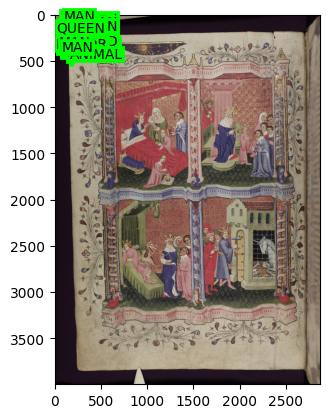

In [12]:
image = np.array(Image.open(requests.get("https://iiif.bodleian.ox.ac.uk/iiif/image/790f4240-9750-4818-8a62-4a88e83e7ab2/full/full/0/default.jpg", stream=True).raw))
fig, ax = plt.subplots()
add_bboxes_to_image(ax, np.uint8(image), bboxes, objects)

## Bounding Box funktioniert halt nicht ...

>Metadata and resizing: The model doesn't process original file names or metadata, and images are resized before analysis, affecting their original dimensions.

([Vision/Limitations](https://platform.openai.com/docs/guides/vision))

